# Artificial Intelligence Topic 4: Machine Learning

## Week 5: Introduction, Ethics and types


## This Week:
### This notebook and Video: Background
- What is ML: recap
- Types of ML
- Ethical Considerations
- Creating and Using Data

### Next Notebook and Video: Types of Machine Learning
- Unsupervised Learning
 - K-Means as an example
- Reinforcement Learning


### Next few weeks: 
- Supervised Machine Learning, 
- Artificial Neural Networks 

## Recap:<img style="float:right" width=300 src="./figures/ML/basic-model-fitting.png">
- Machine Learning is:
 - the application of inductive logic to a dataset
 -  to create useful predictive models.  
 - So it is about solving  modelling problems
 

- In week 1 we learned that problem solving is what you do when one of  
  Input > Model –> Output     is missing
- In the last topic we looked at how we **manually** create models encoding human expertise
- Machine Learning is about how you **automatically** create models  from data (inputs and outputs)


## So it’s all about the data?

### Yes!

The aim is to build ML systems that can be used to do things when data or scenarios arise. 

So we need data to: 
- train them on,  
- choose between models, 
- Know (estimate) how well they are going to do when we start using them

We may not always have an output for every input 
- Because they’re not possible to capture
  - e.g. data from scientific experiments such as genomics, astrophysics,...
- Because sometimes we have to wait a while e.g.,
  - game playing
  - finding human volunteers to label images/ caption videos,...

## Types of Machine Learning
Type | Inputs | Outputs | Feedback | What drives search? | Examples
-----|--------|---------|----------------|---------------------|---------------------
**Supervised** | Data |Predictions for each case | Correct labels | Accuracy of predictions made | **Recognition**  speech, images, actions, **forecasting**
**Reinforcement**| Scenarios | Actions ot take in different states | Periodic Rewards | Expected future feedback | Learning game strategy
**Unsupervised** | Data| Groupings of similar items | None | Statistics about cluster *coherence* and separation | Recommender systems, search engines



## Ethics: *Can* we use the data?
- GDPR,  Privacy policies affect how it is collected
- The law is very clear that we have to give people the right to:
  - Provide Informed Consent about  how we are going to use their personal data at the time we collect it
  - Find out what information we hold about them
  - Withdraw their data (e.g. “right to forget”)

- Examples of unethical use:    
 - Cambridge Analytica,   
 - targeting of fake news, propaganda on social media

- Nowadays there should be clear collaboration agreements describing who is the data controller and who is the data processor


## Ethics: *Should* we use the data? <img src="figures/ML/algorithms-of-oppression.png" style="float:right" width = 100> 
<img style="float:right" src="figures/ML/protected-characteristics.png" width = 400>

- ML is only as good as the data we give it
- So we have to be very careful that the data is representative

- Examples of problems:
  - Microsoft's (abandoned) Tay Bot
  - Google's (heavily modified) Image Recognition
  - Police offender profiling
  - Amazon's (abandoned) hiring policies

Quick Video from Cog-x

[![AI Ethics with Dong Nguyen, The Alan Turing Institute | CogX17 Highlight | CogX](https://img.youtube.com/vi/v=M-ko82Y0GUQ/0.jpg)](https://www.youtube.com/watch?v=M-ko82Y0GUQ)

## Unsupervised Learning <img src="figures/ML/clustering.png" style="float:right" width=300>
- Don’t have labels but we still want to find useful groups
- All data is defined in terms of values for features
  - Numbers,  categories (colour, name, Uni course),  or even just present-absent
- So we define distance measure d(a,b) between two data items a and b.
  - Hamming Distance (e.g.the modified combination lock problems)
  - Euclidean (straight line) distance for continuous numbers
- Typically in clustering we look for a way of putting the data items into k clusters
  - We don't have labels for outputs
   - so drive search between models to maximise *Quality of Clustering*
  - intercluster distance (max value of  d(a,b) for all a,b, in the cluster) is minimized
  - Intracluster distance (min value of d(a,c) for a and c in different clusters) is maximised


In [16]:
import pandas as pd
fruits = pd.read_csv("data/fruits.csv")
fruits.head()

,Red,Green,Blue,Width,Height,Weight,Type
0,58.419302,74.945625,-10.183374,70.887974,82.750860,337.587731,Apple
1,45.829447,69.235825,5.463471,77.003931,81.743449,343.717413,Apple
2,92.292373,84.093548,21.273678,134.796840,29.409867,123.092435,Banana
3,105.985330,58.011805,-4.247407,79.441072,75.705266,356.768309,Orange
4,47.850211,63.244957,-4.979447,78.923563,80.049663,349.511334,Apple


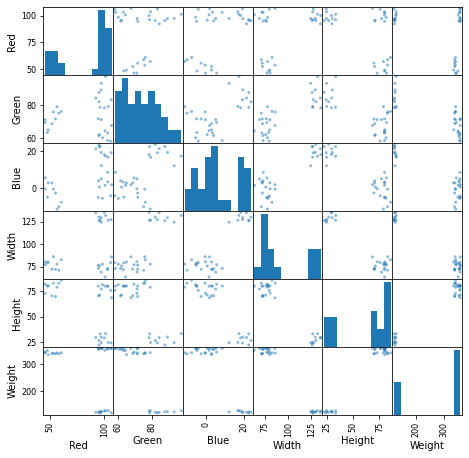

In [17]:
fig = pd.plotting.scatter_matrix(fruits, figsize = [7.5,7.5])

## K-Means <img src = "https://dashee87.github.io/images/kmeans.gif" style="float:right">
Probably the best known clustering algorithm  
**Init**: Pick K data points as initial cluster “centroids”  
**Loop**: until no changes in total sum_squared_distance:  
Step 1 For each data point i:
 - calculate distance d(i,C_k) to each of the centroids C_k, k in (1,,,K)
 - assign datapoint to cluster k* with nearest centroid
 
Step 2 Foreach cluster k in (1...K):
 - Calculate sum of squared distances of cluster elements to centroid \sum d(i,k)^2
 - Set new cluster centroid C_k =  mean position of  points in cluster
   
    
 Example from https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
   
 


## K-Means Strengths and weaknesses 
<img src="figures/ML/kmeans_clustering_examples.png" style="float:right">

### PROS: 
- fast, 
- lots of implementations

### CONS:
- need right value of K, 
- results depend on starting points

### Assumptions:
- all features are relevant, 
- data is "globular" with respect to the current features

### How could we fix the counter-example?

## Reinforcement Learning
Five minute video.

[![Reinforcement learning for bar-tenders](https://img.youtube.com/vi/v=m2weFARriE8/0.jpg)](https://www.youtube.com/watch?v=m2weFARriE8)
https://www.youtube.com/watch?feature=oembed&v=m2weFARriE8

## Reinforcement Learning <img src="figures/ML/RL.png" style="float:right" width=400>
Q learning was best known initial algorithm
- Learns a state-action-reward table
- Problems with scalability as numbers of  
  possible states and actions increase


Deep Reinforcement Learning
- neural net rather than table
- tends to learn “end-to-end”  
  E.g. Alpha Go, Atari simulator
- Relies on lots of data:  
  e.g. Unity: ‘learning brain’
  From ml-agents toolkit
 Links out to tensorflow model


In [ ]:
##  Simple Q learning example  

## Supervised Learning
Basic idea: Models divide up “decision space” into regions


Search for model is driven by accuracy

Form depends on what the ouputs can be
- Two class:  0/1 loss 
- Many class: Cross entropy 
- Continuous: mean squared error

Types of models we’ll look at:
- K Nearest Neighbours
- Greedy Rule Induction
- Naïve Bayes
- Artificial Neural Nets

**Classification** algorithms put labels on regions

**Regression** algorithms compute a function in regions. 

Image showing apples and oranges dataset with labels

## The basic supervised learning process
1. Choose features according to what kind of data you have available
2. Decide what types of model might be appropriate 
 - human readable?,   
 - type and amount of data?    
3. Initialise Model 
4.  While not finished:
  - See how well it does on training set
 - Adapt model to reduce error on training set
5.  Try to estimate how good it is

Often do steps 3-5 above in parallel with different types of model or metaparameters
E.g. max number of rules, max depth of trees, value of k in kNN, learning rates in ANN   


## How we use our data <img src="figures/ML/using_data.png" style="float:right" width=300>

### Unsupervised Learning: 
- Estimate of quality is based on whole dataset,  
  so use it all for training

### Reinforcement learning:
- Problem is usually lack of data compared to size of state-action space.  
- Alternate periods of:
  - training (explore state-action-reward space to improve model)
  - testing (choose current max predicted reward in each state) 
  
### Supervised learning:
Most commonly work in *off-line* or  *batch* mode 
- Random split of the data into separate test set, training set, and sometimes validation set
- Final model then built using all the data available
